In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_6475/2202902619.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
num_scenarios = 5
num_timeperiods = 2

#0.29
mgo_lb = 20
mgo_ub = 40

#0.30
lng_lb = 25
lng_ub = 45

#0.58
biodiesel_lb = 50
biodiesel_ub = 70

#0.82
methanol_lb = 70
methanol_ub = 95

#0.73
ammonia_lb = 60
ammonia_ub = 85

#0.69
electricity_lb = 50
electricity_ub = 90

In [8]:
#Send inn antall scenarier som input
def generate_random_numbers_triangular(num_scenarios, num_timeperiods):
    random_numbers = np.random.triangular(0, 0.5, 1, size=(num_scenarios, num_timeperiods))
    return random_numbers.tolist()

In [16]:
def calculate_fuel_cost(random_numbers, lb, ub):
    fuel_costs = []
    for number in random_numbers:
        fuel_cost = lb + (ub - lb) * number
        fuel_costs.append(fuel_cost)
    return fuel_costs

def calculate_fuel_cost2(random_numbers, lb, ub):
    fuel_costs = []
    for row in random_numbers:
        row_costs = []
        for number in row:
            fuel_cost = lb + (ub - lb) * number
            row_costs.append(fuel_cost)
        fuel_costs.append(row_costs)
    return fuel_costs

In [13]:
fossil_randomnum = generate_random_numbers_triangular(num_scenarios, num_timeperiods)
bio_randomnum = generate_random_numbers_triangular(num_scenarios, num_timeperiods)
electricity_randomnum = generate_random_numbers_triangular(num_scenarios, num_timeperiods)

[[0.3325576806672701, 0.31618734363033435],
 [0.6621276149055848, 0.42590438847281453],
 [0.5285897602692509, 0.5831125101646342],
 [0.5072428184780802, 0.12266171912402876],
 [0.5904896400987694, 0.5770058239985267]]

In [17]:
mgo_costs = calculate_fuel_cost2(fossil_randomnum, mgo_lb, mgo_ub)
mgo_costs

[[26.6511536133454, 26.323746872606687],
 [33.2425522981117, 28.51808776945629],
 [30.571795205385015, 31.662250203292682],
 [30.1448563695616, 22.453234382480574],
 [31.809792801975387, 31.540116479970536]]

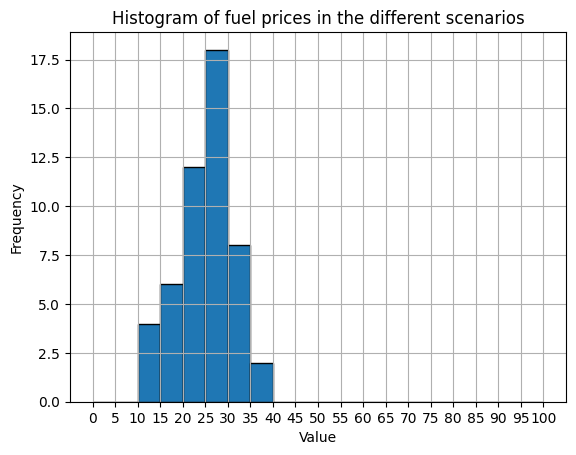

In [7]:
# To control the triangular distribution
plt.hist(fuel1_costs, bins=np.arange(0, 105, 5), edgecolor='black')
plt.title('Histogram of fuel prices in the different scenarios')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 105, 5))
plt.grid(True)
plt.show()